<a href="https://colab.research.google.com/github/goelanmol124/AMC_Trilytics/blob/main/TrilyticsAcheivers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**EDA for Trilytics**

##Basic Dataset Overview

In [ ]:
!pip install catboost
!pip install datasets
!pip install transformers
!pip install wandb





from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

import tensorflow as tf
import tensorflow.keras.backend as K
import tokenizers

from collections import Counter

import pandas as pd
import numpy as np
import regex as re
import statistics
import math
import os
from sklearn.metrics import confusion_matrix, accuracy_score, precision_recall_fscore_support
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn import ensemble, tree, linear_model
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as st
import missingno as msno
from transformers import RobertaTokenizerFast,  RobertaTokenizer, TFRobertaModel, RobertaForSequenceClassification,Trainer, TrainingArguments
import torch.nn as nn
import torch
from torch.utils.data import Dataset, DataLoader
from tqdm import tqdm
import wandb
import lightgbm as lgb
from catboost import CatBoostClassifier

import warnings
warnings.filterwarnings("ignore")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.2/486.2 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 16.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 13.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 53.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 29.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 45.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 22.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 kB 14.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.7/211.7 kB 17.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... d

In [ ]:
try:
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver()
    tf.config.experimental_connect_to_cluster(tpu)
    tf.tpu.experimental.initialize_tpu_system(tpu)
    strategy = tf.distribute.experimental.TPUStrategy(tpu)
    print('Running on TPU ', tpu.master())
except ValueError:
    strategy = tf.distribute.get_strategy()

print('Number of replicas:', strategy.num_replicas_in_sync)

Running on TPU  grpc://10.55.236.10:8470
Number of replicas: 8


In [ ]:
data = pd.read_csv('/content/AMC_health_and_safety_data.xlsx - Data.csv')

In [ ]:
print(data.describe())
cols = data.columns
print(cols)
data = data.replace('?',None)
data = data.replace('? ',None)

numeric_features = data.select_dtypes(include=[np.number])
num_cols = numeric_features.columns

categorical_features = data.select_dtypes(include=[object])
cat_cols = categorical_features.columns

        DOCUMENT_NO    SUBUNIT_CD        CAL_YR       CAL_QTR     FISCAL_YR  \
count  3.601600e+04  36016.000000  36016.000000  36016.000000  36016.000000   
mean   2.200876e+11      4.480231   2008.520824      2.460656   2008.746446   
std    6.297331e+07      9.700525      6.288091      1.101716      6.303127   
min    2.200000e+11      1.000000   2000.000000      1.000000   2000.000000   
25%    2.200320e+11      1.000000   2003.000000      1.000000   2003.000000   
50%    2.200810e+11      1.000000   2008.000000      2.000000   2008.000000   
75%    2.201330e+11      3.000000   2013.000000      3.000000   2013.000000   
max    2.202310e+11     99.000000   2023.000000      4.000000   2023.000000   

         FISCAL_QTR  ACCIDENT_TIME  FIPS_STATE_CD  SHIFT_BEGIN_TIME  \
count  36016.000000   36016.000000   36016.000000      35984.000000   
mean       2.558169    1381.135023      39.095569       1313.260532   
std        1.109400    1384.876660      15.943200       1113.138097   
min 

<Axes: >

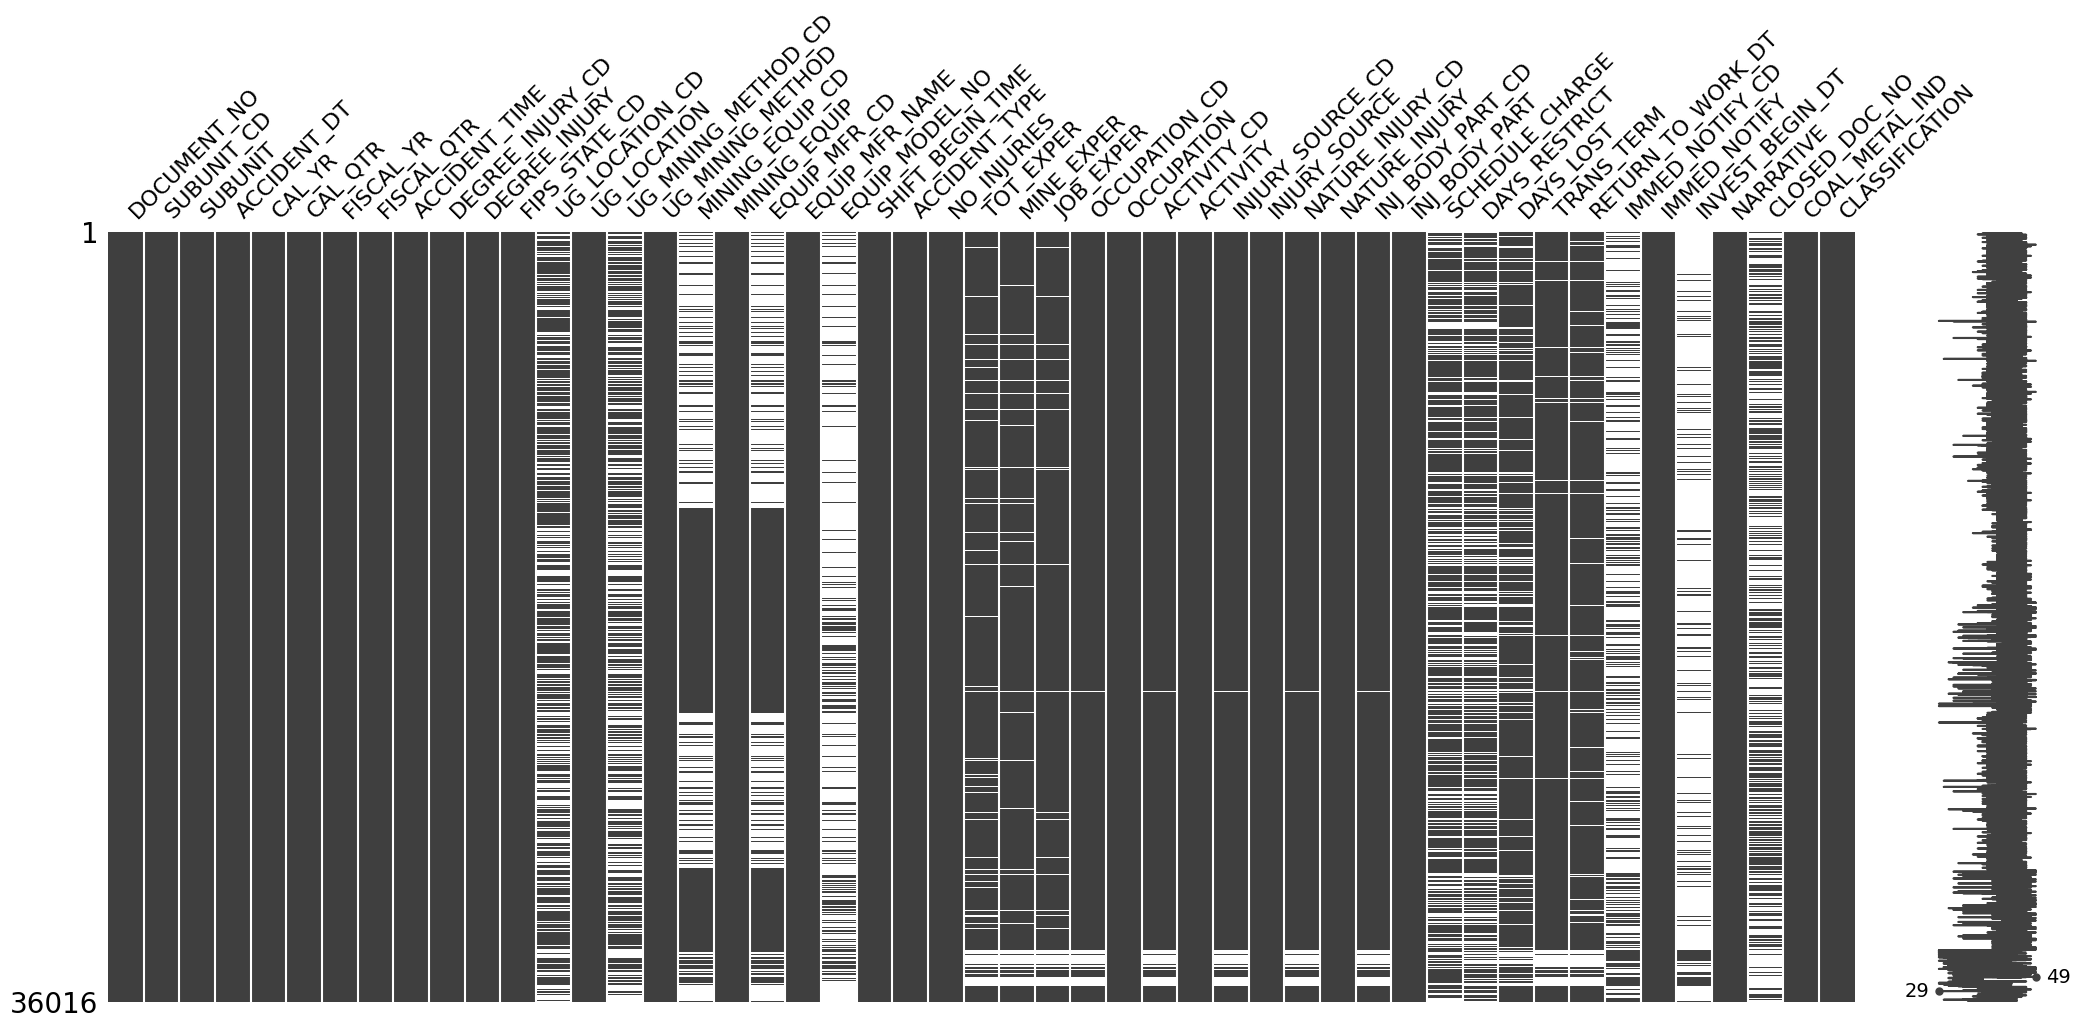

In [ ]:
msno.matrix(data)

<Axes: >

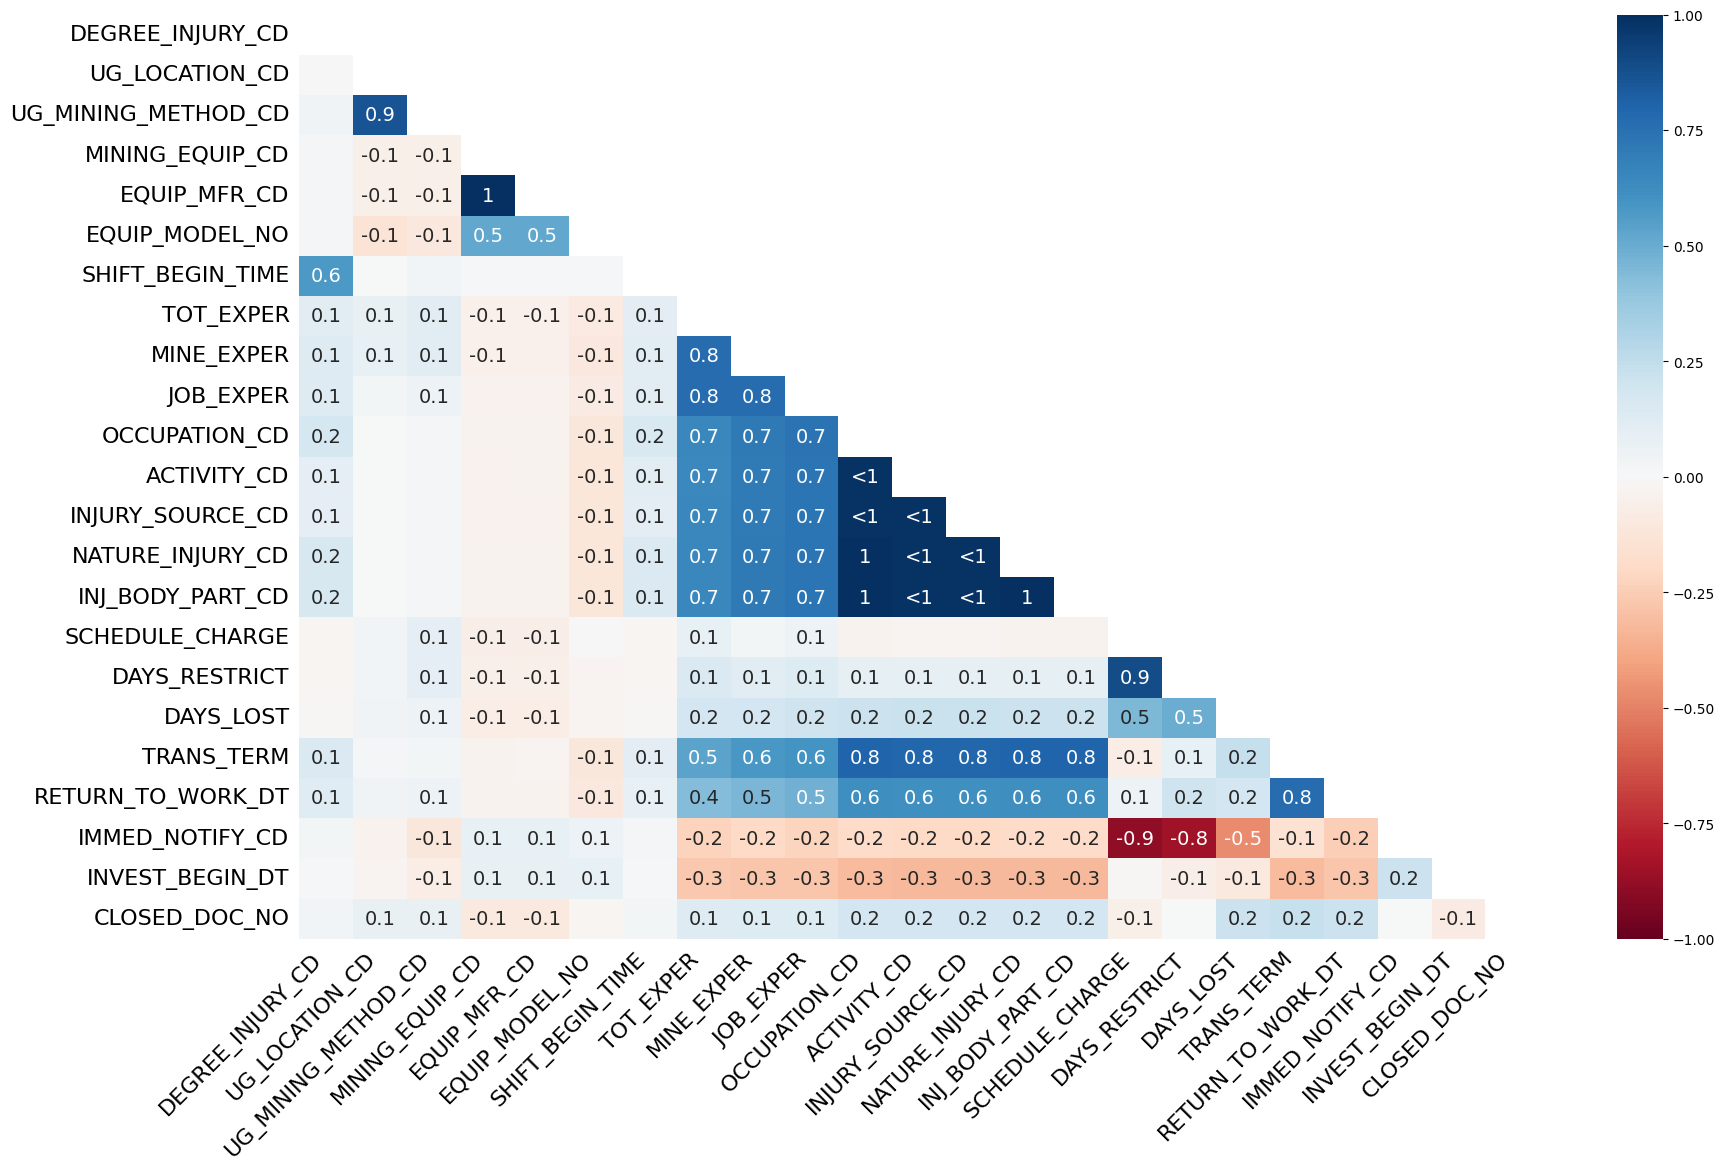

In [ ]:
msno.heatmap(data)

In [ ]:
data.head

<bound method NDFrame.head of         DOCUMENT_NO  SUBUNIT_CD                           SUBUNIT ACCIDENT_DT  \
0      220143000000          30  MILL OPERATION/PREPARATION PLANT    9/8/2014   
1      220163000000           1                       UNDERGROUND  10/26/2016   
2      220053000000           3            STRIP, QUARY, OPEN PIT   10/4/2005   
3      220063000000          30  MILL OPERATION/PREPARATION PLANT  10/17/2006   
4      220151000000           1                       UNDERGROUND   2/11/2015   
...             ...         ...                               ...         ...   
36011  220083000000           1                       UNDERGROUND   11/7/2008   
36012  220060000000           3            STRIP, QUARY, OPEN PIT    1/3/2006   
36013  220043000000           2            SURFACE AT UNDERGROUND  10/18/2004   
36014  220181000000           1                       UNDERGROUND    5/2/2018   
36015  220142000000          30  MILL OPERATION/PREPARATION PLANT    8/2/2014  

In [ ]:
'''count = 1
print(len(num_cols))
for i in num_cols:
  y = numeric_features[i]
  plt.figure(count); plt.title(i)
  sns.displot(y)
  count += 1
  print(count, '  /  ', len(num_cols))'''

"count = 1\nprint(len(num_cols))\nfor i in num_cols:\n  y = numeric_features[i]\n  plt.figure(count); plt.title(i)\n  sns.displot(y)\n  count += 1\n  print(count, '  /  ', len(num_cols))"

1. Clear Decrease in incidents can be seen year by year.
2. Year Quarter seems equally distributed
3. Accident Time does show some distribution
4. Certain States are more prone to accidents

In [ ]:
print(cols)



Index(['DOCUMENT_NO', 'SUBUNIT_CD', 'SUBUNIT', 'ACCIDENT_DT', 'CAL_YR',
       'CAL_QTR', 'FISCAL_YR', 'FISCAL_QTR', 'ACCIDENT_TIME',
       'DEGREE_INJURY_CD', 'DEGREE_INJURY', 'FIPS_STATE_CD', 'UG_LOCATION_CD',
       'UG_LOCATION', 'UG_MINING_METHOD_CD', 'UG_MINING_METHOD',
       'MINING_EQUIP_CD', 'MINING_EQUIP', 'EQUIP_MFR_CD', 'EQUIP_MFR_NAME',
       'EQUIP_MODEL_NO', 'SHIFT_BEGIN_TIME', 'ACCIDENT_TYPE', 'NO_INJURIES',
       'TOT_EXPER', 'MINE_EXPER', 'JOB_EXPER', 'OCCUPATION_CD', 'OCCUPATION',
       'ACTIVITY_CD', 'ACTIVITY', 'INJURY_SOURCE_CD', 'INJURY_SOURCE',
       'NATURE_INJURY_CD', 'NATURE_INJURY', 'INJ_BODY_PART_CD',
       'INJ_BODY_PART', 'SCHEDULE_CHARGE', 'DAYS_RESTRICT', 'DAYS_LOST',
       'TRANS_TERM', 'RETURN_TO_WORK_DT', 'IMMED_NOTIFY_CD', 'IMMED_NOTIFY',
       'INVEST_BEGIN_DT', 'NARRATIVE', 'CLOSED_DOC_NO', 'COAL_METAL_IND',
       'CLASSIFICATION'],
      dtype='object')


In [ ]:
interested_columns = ['SUBUNIT_CD','CAL_YR','CAL_QTR','ACCIDENT_TIME', 'DEGREE_INJURY_CD','FIPS_STATE_CD','UG_LOCATION_CD','UG_MINING_METHOD_CD','MINING_EQUIP_CD','EQUIP_MFR_CD','SHIFT_BEGIN_TIME','NO_INJURIES','TOT_EXPER','OCCUPATION_CD','ACTIVITY_CD','INJURY_SOURCE_CD','NATURE_INJURY_CD','INJ_BODY_PART_CD','DAYS_LOST','IMMED_NOTIFY_CD','COAL_METAL_IND','CLASSIFICATION']
interested_data = data[interested_columns]
class_encode = interested_data['CLASSIFICATION'].unique()
class_encode = enumerate(class_encode)
class_encode = {i[1]:str(i[0]) for i in class_encode}



print(class_encode)
interested_data = interested_data.replace(class_encode)
interested_data = interested_data.replace({'C':'1','M':'2'})
interested_data['DEGREE_INJURY_CD'] = interested_data['DEGREE_INJURY_CD'].fillna('0')
interested_data['FIPS_STATE_CD'] = interested_data['FIPS_STATE_CD'].fillna('99')
interested_data['TOT_EXPER'] = interested_data['TOT_EXPER'].fillna(interested_data['TOT_EXPER'].mean())
interested_data['TOT_EXPER'] = interested_data['TOT_EXPER']//1
interested_data['IMMED_NOTIFY_CD'] = interested_data['IMMED_NOTIFY_CD'].fillna('13')
interested_data = interested_data.fillna('0')
for i in interested_columns:
  print(i,' : ',interested_data[i].nunique())

{'HANDLING OF MATERIALS': '0', 'SLIP OR FALL OF PERSON': '1', 'HAULAGE': '2', 'FIRE/EXPLOSION': '3', 'EXPLOSIVES AND BREAKING AGENTS': '4', 'ELECTRICAL': '5', 'EXPLODING VESSELS UNDER PRESSURE': '6', 'TOXIC': '7', 'ENTRAPMENT': '8', 'INUNDATION': '9', 'OTHER': '10'}
SUBUNIT_CD  :  9
CAL_YR  :  20
CAL_QTR  :  4
ACCIDENT_TIME  :  940
DEGREE_INJURY_CD  :  11
FIPS_STATE_CD  :  25
UG_LOCATION_CD  :  9
UG_MINING_METHOD_CD  :  8
MINING_EQUIP_CD  :  64
EQUIP_MFR_CD  :  171
SHIFT_BEGIN_TIME  :  211
NO_INJURIES  :  7
TOT_EXPER  :  54
OCCUPATION_CD  :  181
ACTIVITY_CD  :  95
INJURY_SOURCE_CD  :  122
NATURE_INJURY_CD  :  30
INJ_BODY_PART_CD  :  47
DAYS_LOST  :  475
IMMED_NOTIFY_CD  :  13
COAL_METAL_IND  :  2
CLASSIFICATION  :  11


<Axes: title={'center': 'SHIFT_BEGIN_TIME'}>

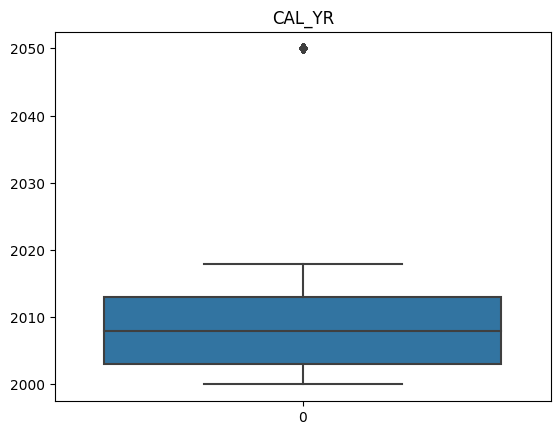

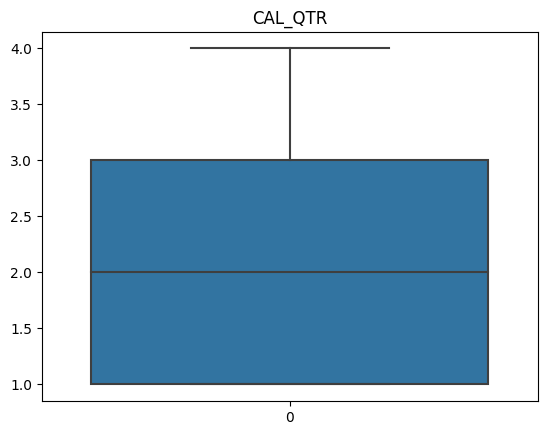

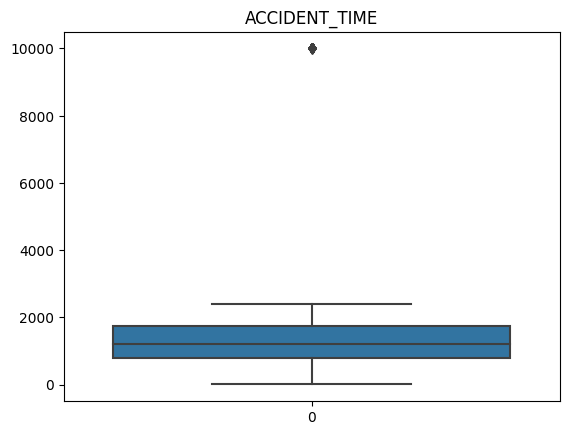

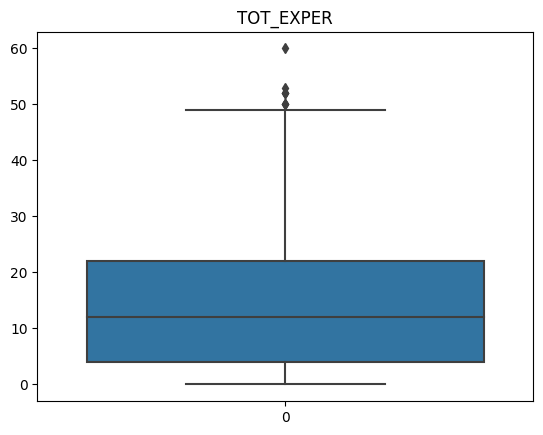

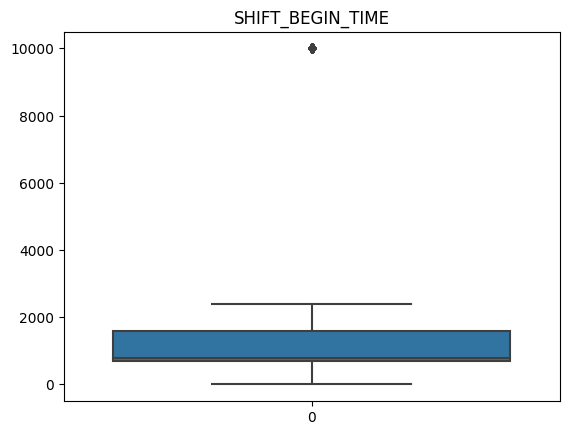

In [ ]:
plt.figure(1)
plt.title('CAL_YR')
sns.boxplot(interested_data['CAL_YR'])
plt.figure(2)
plt.title('CAL_QTR')
sns.boxplot(interested_data['CAL_QTR'])
plt.figure(3)
plt.title('ACCIDENT_TIME')
sns.boxplot(interested_data['ACCIDENT_TIME'])
plt.figure(4)
plt.title('TOT_EXPER')
sns.boxplot(interested_data['TOT_EXPER'])
plt.figure(5)
plt.title('SHIFT_BEGIN_TIME')
sns.boxplot(interested_data['SHIFT_BEGIN_TIME'])

<Axes: xlabel='CLASSIFICATION', ylabel='count'>

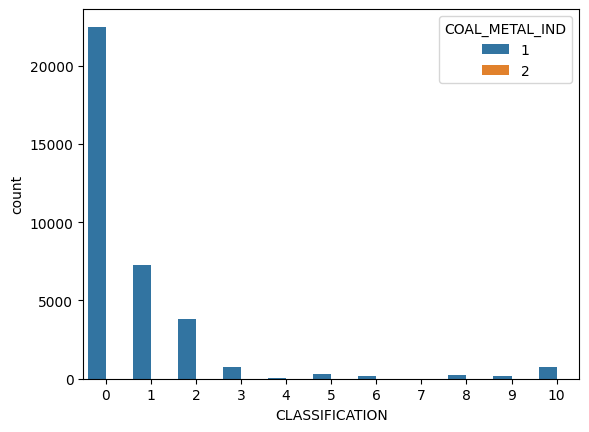

In [ ]:
sns.countplot(data = interested_data, x = 'CLASSIFICATION', hue = 'COAL_METAL_IND')

<Axes: xlabel='FIPS_STATE_CD', ylabel='count'>

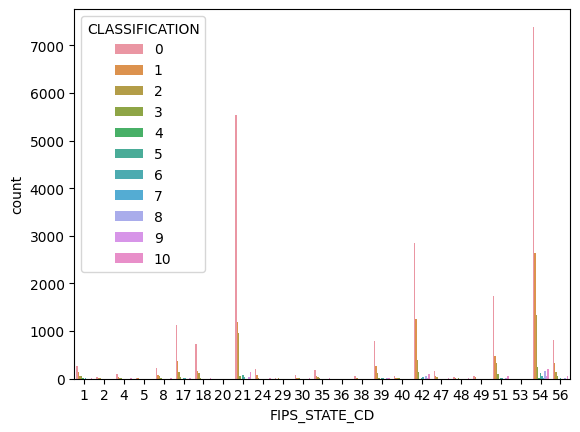

In [ ]:
sns.countplot(data = interested_data, x = 'FIPS_STATE_CD', hue = 'CLASSIFICATION')

In [ ]:
for i in interested_columns:
  print(i,' : ',interested_data[i].nunique())

SUBUNIT_CD  :  9
CAL_YR  :  24
CAL_QTR  :  4
ACCIDENT_TIME  :  942
DEGREE_INJURY_CD  :  12
FIPS_STATE_CD  :  25
UG_LOCATION_CD  :  9
UG_MINING_METHOD_CD  :  8
MINING_EQUIP_CD  :  64
EQUIP_MFR_CD  :  172
SHIFT_BEGIN_TIME  :  210
NO_INJURIES  :  7
TOT_EXPER  :  2415
OCCUPATION_CD  :  181
ACTIVITY_CD  :  95
INJURY_SOURCE_CD  :  122
NATURE_INJURY_CD  :  30
INJ_BODY_PART_CD  :  47
DAYS_LOST  :  474
IMMED_NOTIFY_CD  :  14
COAL_METAL_IND  :  2
CLASSIFICATION  :  11


<Axes: xlabel='IMMED_NOTIFY_CD', ylabel='count'>

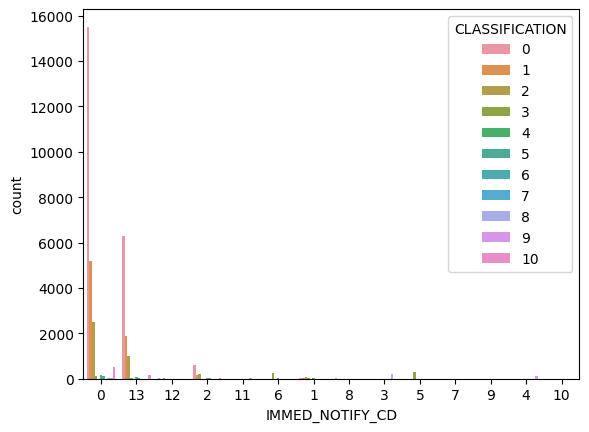

In [ ]:
sns.countplot(data = interested_data, x = 'IMMED_NOTIFY_CD', hue = 'CLASSIFICATION')

In [ ]:
print(interested_data['COAL_METAL_IND'].value_counts())
print(interested_data['CLASSIFICATION'].value_counts())
print(interested_data['IMMED_NOTIFY_CD'].value_counts())
print(interested_data['UG_LOCATION_CD'].value_counts())


1    35988
2       28
Name: COAL_METAL_IND, dtype: int64
0     22491
1      7275
2      3830
3       779
10      734
5       291
8       248
9       168
6       165
4        22
7        13
Name: CLASSIFICATION, dtype: int64
0     24203
13     9493
2      1050
5       318
6       281
3       217
1       186
4       137
11       41
12       38
8        31
7        13
10        6
9         2
Name: IMMED_NOTIFY_CD, dtype: int64
0     11524
3      8919
6      8155
4      2784
98     2340
99      783
1       747
2       524
5       240
Name: UG_LOCATION_CD, dtype: int64


In [ ]:
X = interested_data[interested_columns[:-1]]
X = pd.get_dummies(X,drop_first=True)
y = interested_data['CLASSIFICATION']



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)


clf = lgb.LGBMClassifier()
clf.fit(X_train, y_train)

LGBMClassifier()

In [ ]:
print("LIGHTGBM")
y_pred=clf.predict(X_test)


accuracy=accuracy_score(y_pred, y_test)
print('LightGBM Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))

y_pred_train = clf.predict(X_train)
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))




LIGHTGBM
LightGBM Model accuracy score: 0.8130
Training-set accuracy score: 0.8609


In [ ]:
'''
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)

clf2 = XGBClassifier()
clf2.fit(X_train, y_train)
'''

'\nfrom xgboost import XGBClassifier\nfrom sklearn.preprocessing import LabelEncoder\nle = LabelEncoder()\ny_train = le.fit_transform(y_train)\n\nclf2 = XGBClassifier()\nclf2.fit(X_train, y_train)\n'

In [ ]:
'''
print("XGBOOST")
y_pred=clf2.predict(X_test)
y_test = le.fit_transform(y_test)
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_pred, y_test)
print('XGBoost Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))

y_pred_train = clf2.predict(X_train)
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))
'''

'\nprint("XGBOOST")\ny_pred=clf2.predict(X_test)\ny_test = le.fit_transform(y_test)\nfrom sklearn.metrics import accuracy_score\naccuracy=accuracy_score(y_pred, y_test)\nprint(\'XGBoost Model accuracy score: {0:0.4f}\'.format(accuracy_score(y_test, y_pred)))\n\ny_pred_train = clf2.predict(X_train)\nprint(\'Training-set accuracy score: {0:0.4f}\'. format(accuracy_score(y_train, y_pred_train)))\n'

In [ ]:

X = interested_data[interested_columns[:-1]]
X['NARRATIVE'] = data['NARRATIVE']
y = interested_data['CLASSIFICATION']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

clf3 = CatBoostClassifier(iterations = 300)
clf3.fit(X_train.astype(str),y_train.astype(str), cat_features = [i for i in range(len(interested_columns)-1)], text_features=[len(interested_columns)-1])

Learning rate set to 0.25801
0:	learn: 1.3242739	total: 15.8s	remaining: 1h 18m 29s
1:	learn: 0.8680925	total: 38.4s	remaining: 1h 35m 19s
2:	learn: 0.7081159	total: 49.9s	remaining: 1h 22m 19s
3:	learn: 0.5978807	total: 1m 2s	remaining: 1h 16m 44s
4:	learn: 0.5199711	total: 1m 14s	remaining: 1h 13m 2s
5:	learn: 0.4718021	total: 1m 24s	remaining: 1h 9m 14s
6:	learn: 0.4300685	total: 1m 35s	remaining: 1h 6m 17s
7:	learn: 0.3972034	total: 1m 44s	remaining: 1h 3m 31s
8:	learn: 0.3692783	total: 1m 53s	remaining: 1h 1m 4s
9:	learn: 0.3469035	total: 2m 5s	remaining: 1h 28s
10:	learn: 0.3330227	total: 2m 15s	remaining: 59m 29s
11:	learn: 0.3216678	total: 2m 24s	remaining: 57m 51s
12:	learn: 0.3103763	total: 2m 34s	remaining: 56m 52s
13:	learn: 0.3018192	total: 2m 44s	remaining: 55m 57s
14:	learn: 0.2935486	total: 2m 51s	remaining: 54m 19s
15:	learn: 0.2845894	total: 3m 2s	remaining: 53m 52s
16:	learn: 0.2793130	total: 3m 13s	remaining: 53m 45s
17:	learn: 0.2738176	total: 3m 21s	remaining: 52m

In [ ]:
print("Catboost")
y_pred=clf3.predict(X_test.astype(str))
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_pred, y_test.astype(str))
print('Catboost Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test.astype(str), y_pred.astype(str))))

y_pred_train = clf3.predict(X_train.astype(str))
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train.astype(str), y_pred_train.astype(str))))

Catboost
Catboost Model accuracy score: 0.9353
Training-set accuracy score: 0.9527


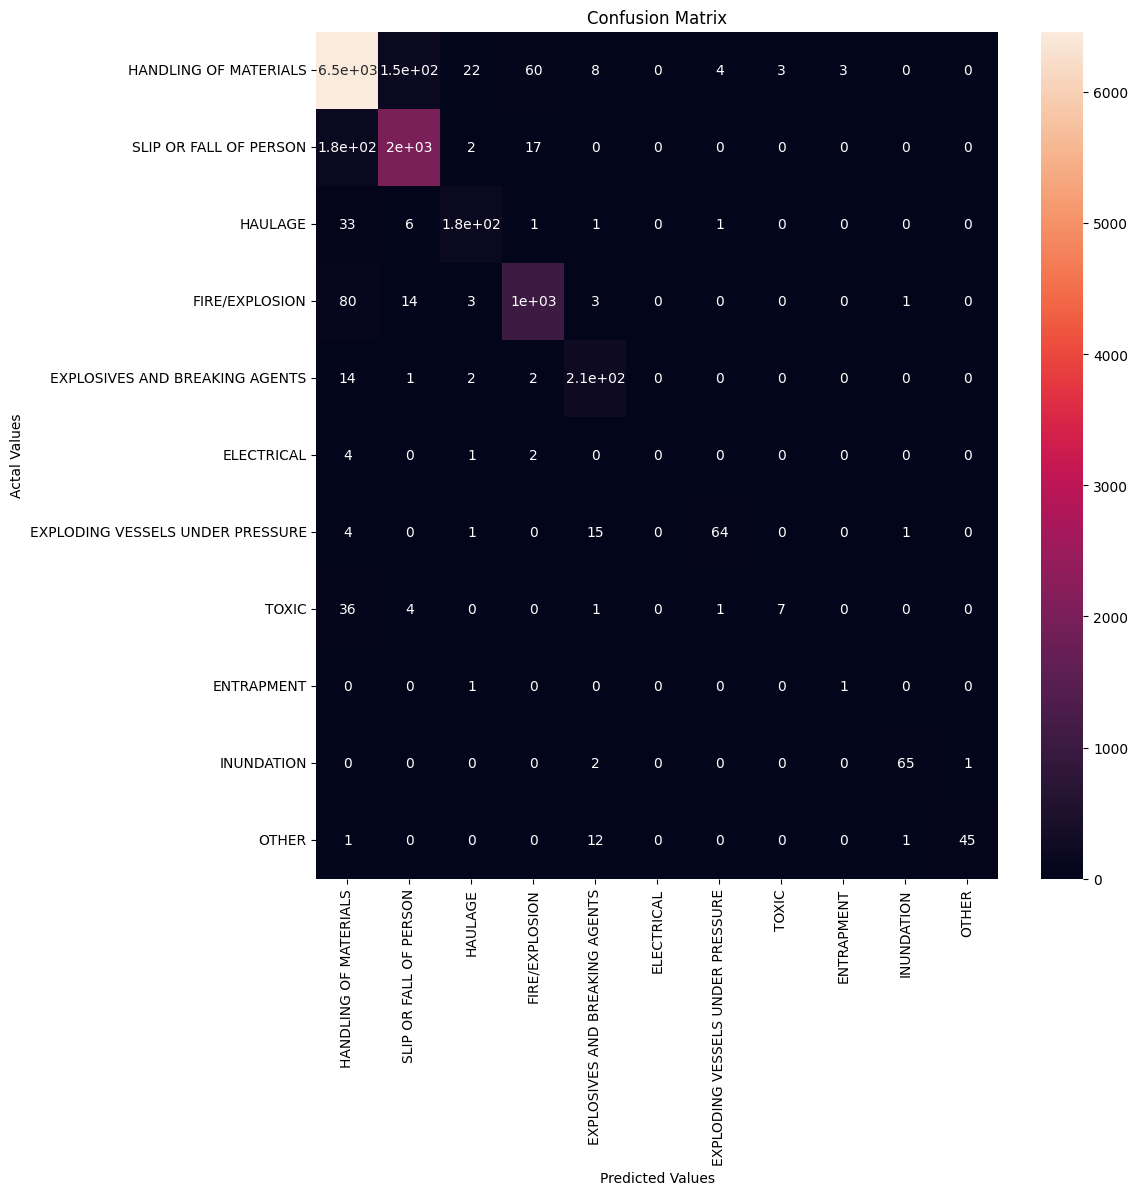

In [ ]:

cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm,
                     index = class_encode.keys(),
                     columns = class_encode.keys())
plt.figure(figsize=(11,11))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

The Confusion Matrix Shows that:
1. Handling of Materials has been majorly confused with slip or fall which may be similar incidents and based on subjective understanding. Otherwise it has 96.29% Accuracy
2. Exploding Vessels and "Explosive and Braking Agents" Have been confused that may be attributed to subjective inference

In [ ]:
keys_encode = {v:k for k,v in class_encode.items()}
for i in range(len(y_pred)):
  if y_pred[i][0] != y_test.iloc[i]:
    print(X_test['NARRATIVE'].iloc[i])
    print(keys_encode[y_pred[i][0]],keys_encode[y_test.iloc[i]])


he was walking around miner while working on it,when he stepped in a hole spraining his knee.   *started missing on 03/04/04*
HANDLING OF MATERIALS SLIP OR FALL OF PERSON
ee leaned a spare shuttle car tire against the rib in the supply road. as he turned to walk away the tire fell over and landed on his lower leg and ankle causing a fracture. ee started missing work 3/2/06.
SLIP OR FALL OF PERSON HANDLING OF MATERIALS
subject was attempting to lift a battery out when strap broke, causing him to be off balance, hitting his head against roof of mine.
HAULAGE SLIP OR FALL OF PERSON
while installing structural steel doors over coal bin ee went around safety rail without using fall protection on the door which was still attached to the crane to try to move the door & close a gap between the doors. the door shifted causing a support i-beam to move shifting the doors which caused him to fall. msha was notified 12/27/05 that he had expired from his injuries.
HANDLING OF MATERIALS SLIP OR FALL 

In [ ]:
data = pd.read_csv('/content/AMC_health_and_safety_data.xlsx - Data.csv')
data = data.replace('?',None)
data = data.replace('? ',None)

interested_columns = ['SUBUNIT_CD','CAL_YR','CAL_QTR','ACCIDENT_TIME', 'DEGREE_INJURY_CD','FIPS_STATE_CD','UG_LOCATION_CD','UG_MINING_METHOD_CD','MINING_EQUIP_CD','EQUIP_MFR_CD','SHIFT_BEGIN_TIME','NO_INJURIES','TOT_EXPER','OCCUPATION_CD','ACTIVITY_CD','INJURY_SOURCE_CD','NATURE_INJURY_CD','INJ_BODY_PART_CD','DAYS_LOST','IMMED_NOTIFY_CD','COAL_METAL_IND','CLASSIFICATION']
interested_data = data[interested_columns]
class_encode = interested_data['CLASSIFICATION'].unique()
class_encode = enumerate(class_encode)
class_encode = {i[1]:str(i[0]) for i in class_encode}



interested_data = interested_data.replace(class_encode)
interested_data = interested_data.replace({'C':'1','M':'2'})
interested_data['DEGREE_INJURY_CD'] = interested_data['DEGREE_INJURY_CD'].fillna('0')
interested_data['FIPS_STATE_CD'] = interested_data['FIPS_STATE_CD'].fillna('99')
interested_data['TOT_EXPER'] = interested_data['TOT_EXPER'].fillna(interested_data['TOT_EXPER'].mean())
interested_data['TOT_EXPER'] = interested_data['TOT_EXPER']//1
interested_data['IMMED_NOTIFY_CD'] = interested_data['IMMED_NOTIFY_CD'].fillna('13')
interested_data = interested_data.fillna('0')


X = interested_data[interested_columns[:-1]]
X_t = data['NARRATIVE'].to_numpy().reshape(-1)
X_t = roberta_encode(X_t,tokenizer)
X_t = model.predict(X_t).to_numpy()
X['NARRATIVE'] = X_t.tolist()

y = interested_data['CLASSIFICATION']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

clf3 = CatBoostClassifier(iterations = 1000)
clf3.fit(X_train.astype(str),y_train.astype(str), cat_features = [i for i in range(len(interested_columns))])

print("Catboost")
y_pred=clf3.predict(X_test.astype(str))
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_pred, y_test.astype(str))
print('Catboost Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test.astype(str), y_pred.astype(str))))

y_pred_train = clf3.predict(X_train.astype(str))
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train.astype(str), y_pred_train.astype(str))))

cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm,
                     index = class_encode.keys(),
                     columns = class_encode.keys())
plt.figure(figsize=(11,11))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()


1126/1126 [==============================] - 36s 31ms/step


AttributeError: ignored

In [ ]:
# Importing the libraries needed
!pip install transformers
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import torch
import seaborn as sns
import transformers
import json
from tqdm import tqdm
from torch.utils.data import Dataset, DataLoader
from transformers import RobertaModel, RobertaTokenizer
import logging
logging.basicConfig(level=logging.ERROR)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 64.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 22.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 82.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 54.2 MB/s eta 0:00:00


In [ ]:
# Setting up the device for GPU usage

from torch import cuda
device = 'cuda' if cuda.is_available() else 'cpu'

In [ ]:
df = pd.read_csv('/content/AMC_health_and_safety_data.xlsx - Data.csv')
new_df = df[['NARRATIVE', 'CLASSIFICATION']]
class_encode = new_df['CLASSIFICATION'].unique()
class_encode = enumerate(class_encode)
class_encode = {i[1]:i[0] for i in class_encode}
new_df = new_df.replace(class_encode)


In [ ]:
# Defining some key variables that will be used later on in the training
MAX_LEN = 256
TRAIN_BATCH_SIZE = 8
VALID_BATCH_SIZE = 4
# EPOCHS = 1
LEARNING_RATE = 1e-05
tokenizer = RobertaTokenizer.from_pretrained('roberta-base', truncation=True, do_lower_case=True)

In [ ]:
class ClassificationData(Dataset):
    def __init__(self, dataframe, tokenizer, max_len):
        self.tokenizer = tokenizer
        self.data = dataframe
        self.text = dataframe.NARRATIVE
        self.targets = self.data.CLASSIFICATION
        self.max_len = max_len

    def __len__(self):
        return len(self.text)

    def __getitem__(self, index):
        text = str(self.text[index])
        text = " ".join(text.split())

        inputs = self.tokenizer.encode_plus(
            text,
            None,
            add_special_tokens=True,
            max_length=self.max_len,
            pad_to_max_length=True,
            return_token_type_ids=True
        )
        ids = inputs['input_ids']
        mask = inputs['attention_mask']
        token_type_ids = inputs["token_type_ids"]


        return {
            'ids': torch.tensor(ids, dtype=torch.long),
            'mask': torch.tensor(mask, dtype=torch.long),
            'token_type_ids': torch.tensor(token_type_ids, dtype=torch.long),
            'targets': torch.tensor(self.targets[index], dtype=torch.float)
        }

In [ ]:
train_size = 0.8
train_data=new_df.sample(frac=train_size,random_state=200)
test_data=new_df.drop(train_data.index).reset_index(drop=True)
train_data = train_data.reset_index(drop=True)


print("FULL Dataset: {}".format(new_df.shape))
print("TRAIN Dataset: {}".format(train_data.shape))
print("TEST Dataset: {}".format(test_data.shape))

training_set = ClassificationData(train_data, tokenizer, MAX_LEN)
testing_set = ClassificationData(test_data, tokenizer, MAX_LEN)

FULL Dataset: (36016, 2)
TRAIN Dataset: (28813, 2)
TEST Dataset: (7203, 2)


In [ ]:
train_params = {'batch_size': TRAIN_BATCH_SIZE,
                'shuffle': True,
                'num_workers': 0
                }

test_params = {'batch_size': VALID_BATCH_SIZE,
                'shuffle': True,
                'num_workers': 0
                }

training_loader = DataLoader(training_set, **train_params)
testing_loader = DataLoader(testing_set, **test_params)

In [ ]:
class RobertaClass(torch.nn.Module):
    def __init__(self):
        super(RobertaClass, self).__init__()
        self.l1 = RobertaModel.from_pretrained("roberta-base")
        self.pre_classifier = torch.nn.Linear(768, 256)
        self.dropout = torch.nn.Dropout(0.3)
        self.classifier = torch.nn.Linear(256, 11)

    def forward(self, input_ids, attention_mask, token_type_ids):
        output_1 = self.l1(input_ids=input_ids, attention_mask=attention_mask, token_type_ids=token_type_ids)
        hidden_state = output_1[0]
        pooler = hidden_state[:, 0]
        pooler = self.pre_classifier(pooler)
        pooler = torch.nn.ReLU()(pooler)
        pooler = self.dropout(pooler)
        output = self.classifier(pooler)
        return output

In [ ]:
model = RobertaClass()
model.to(device)

Some weights of the model checkpoint at roberta-base were not used when initializing RobertaModel: ['lm_head.dense.bias', 'lm_head.layer_norm.bias', 'lm_head.dense.weight', 'lm_head.bias', 'lm_head.layer_norm.weight']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaModel were not initialized from the model checkpoint at roberta-base and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


RobertaClass(
  (l1): RobertaModel(
    (embeddings): RobertaEmbeddings(
      (word_embeddings): Embedding(50265, 768, padding_idx=1)
      (position_embeddings): Embedding(514, 768, padding_idx=1)
      (token_type_embeddings): Embedding(1, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): RobertaEncoder(
      (layer): ModuleList(
        (0-11): 12 x RobertaLayer(
          (attention): RobertaAttention(
            (self): RobertaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): RobertaSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((

In [ ]:
# Creating the loss function and optimizer
loss_function = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params =  model.parameters(), lr=LEARNING_RATE)

In [ ]:
def calcuate_accuracy(preds, targets):
    n_correct = (preds==targets).sum().item()
    return n_correct

In [ ]:
# Defining the training function on the 80% of the dataset for tuning the distilbert model

def train(epoch):
    tr_loss = 0
    n_correct = 0
    nb_tr_steps = 0
    nb_tr_examples = 0
    model.train()
    for _,data in tqdm(enumerate(training_loader, 0)):
        ids = data['ids'].to(device, dtype = torch.long)
        mask = data['mask'].to(device, dtype = torch.long)
        token_type_ids = data['token_type_ids'].to(device, dtype = torch.long)
        targets = data['targets'].to(device, dtype = torch.long)

        outputs = model(ids, mask, token_type_ids)
        loss = loss_function(outputs, targets)
        tr_loss += loss.item()
        big_val, big_idx = torch.max(outputs.data, dim=1)
        n_correct += calcuate_accuracy(big_idx, targets)

        nb_tr_steps += 1
        nb_tr_examples+=targets.size(0)

        if _%5000==0:
            loss_step = tr_loss/nb_tr_steps
            accu_step = (n_correct*100)/nb_tr_examples
            print(f"Training Loss per 5000 steps: {loss_step}")
            print(f"Training Accuracy per 5000 steps: {accu_step}")

        optimizer.zero_grad()
        loss.backward()
        # # When using GPU
        optimizer.step()

    print(f'The Total Accuracy for Epoch {epoch}: {(n_correct*100)/nb_tr_examples}')
    epoch_loss = tr_loss/nb_tr_steps
    epoch_accu = (n_correct*100)/nb_tr_examples
    print(f"Training Loss Epoch: {epoch_loss}")
    print(f"Training Accuracy Epoch: {epoch_accu}")

    return

In [ ]:
EPOCHS = 5
for epoch in range(EPOCHS):
    train(epoch)

1it [00:00,  7.11it/s]

Training Loss per 5000 steps: 0.03783039376139641
Training Accuracy per 5000 steps: 100.0


3602it [21:13,  2.83it/s]

The Total Accuracy for Epoch 0: 92.23614340748968
Training Loss Epoch: 0.24510362491010068
Training Accuracy Epoch: 92.23614340748968


In [ ]:
def valid(model, testing_loader):
    model.eval()
    n_correct = 0; n_wrong = 0; total = 0; tr_loss=0; nb_tr_steps=0; nb_tr_examples=0
    with torch.no_grad():
        for _, data in tqdm(enumerate(testing_loader, 0)):
            ids = data['ids'].to(device, dtype = torch.long)
            mask = data['mask'].to(device, dtype = torch.long)
            token_type_ids = data['token_type_ids'].to(device, dtype=torch.long)
            targets = data['targets'].to(device, dtype = torch.long)
            outputs = model(ids, mask, token_type_ids).squeeze()
            loss = loss_function(outputs, targets)
            tr_loss += loss.item()
            big_val, big_idx = torch.max(outputs.data, dim=1)
            n_correct += calcuate_accuracy(big_idx, targets)

            nb_tr_steps += 1
            nb_tr_examples+=targets.size(0)

            if _%5000==0:
                loss_step = tr_loss/nb_tr_steps
                accu_step = (n_correct*100)/nb_tr_examples
                print(f"Validation Loss per 100 steps: {loss_step}")
                print(f"Validation Accuracy per 100 steps: {accu_step}")
    epoch_loss = tr_loss/nb_tr_steps
    epoch_accu = (n_correct*100)/nb_tr_examples
    print(f"Validation Loss Epoch: {epoch_loss}")
    print(f"Validation Accuracy Epoch: {epoch_accu}")

    return epoch_accu


In [ ]:
acc = valid(model, testing_loader)
print("Accuracy on test data = %0.2f%%" % acc)

2it [00:00, 11.54it/s]

Validation Loss per 100 steps: 0.03403513506054878
Validation Accuracy per 100 steps: 100.0


1801it [01:46, 16.87it/s]

Validation Loss Epoch: 0.26511027459091385
Validation Accuracy Epoch: 91.21199500208246
Accuracy on test data = 91.21%


In [ ]:
output_model_file = 'pytorch_roberta_sentiment.bin'
output_vocab_file = './'

model_to_save = model
torch.save(model_to_save, output_model_file)
tokenizer.save_vocabulary(output_vocab_file)

print('All files saved')
print('This tutorial is completed')

All files saved
This tutorial is completed


In [ ]:
class PredictionData(Dataset):
    def __init__(self, dataframe, tokenizer, max_len):
        self.tokenizer = tokenizer
        self.data = dataframe
        self.text = dataframe.NARRATIVE
        self.max_len = max_len

    def __len__(self):
        return len(self.text)

    def __getitem__(self, index):
        text = str(self.text[index])
        text = " ".join(text.split())

        inputs = self.tokenizer.encode_plus(
            text,
            None,
            add_special_tokens=True,
            max_length=self.max_len,
            pad_to_max_length=True,
            return_token_type_ids=True
        )
        ids = inputs['input_ids']
        mask = inputs['attention_mask']
        token_type_ids = inputs["token_type_ids"]


        return {
            'ids': torch.tensor(ids, dtype=torch.long),
            'mask': torch.tensor(mask, dtype=torch.long),
            'token_type_ids': torch.tensor(token_type_ids, dtype=torch.long)
        }

In [ ]:
def predict(model,data,tokenizer):
  MAX_LEN = 256
  dataloader = PredictionData(data,tokenizer,MAX_LEN)
  model.eval()
  l = []
  for i in range(len(data)):
    val = dataloader[i]
    ids = (val['ids'])
    mask = (val['mask'])
    token_type_ids = val['token_type_ids']
    ids = torch.tensor(ids).to(device, dtype = torch.long).reshape(1,256)
    mask = torch.tensor(mask).to(device, dtype = torch.long).reshape(1,256)
    token_type_ids = torch.tensor(token_type_ids).to(device, dtype = torch.long).reshape(1,256)

    outputs = model(ids, mask, token_type_ids)
    big_val, big_idx = torch.max(outputs.data, dim=1)
    l.append(big_idx.item())
  return l


In [ ]:
data = pd.read_csv('/content/AMC_health_and_safety_data.xlsx - Data.csv')
data = data.replace('?',None)
data = data.replace('? ',None)

interested_columns = ['SUBUNIT_CD','CAL_YR','CAL_QTR', 'DEGREE_INJURY_CD','FIPS_STATE_CD','UG_LOCATION_CD','UG_MINING_METHOD_CD','MINING_EQUIP_CD','EQUIP_MFR_CD','NO_INJURIES','TOT_EXPER','ACTIVITY_CD','INJURY_SOURCE_CD','NATURE_INJURY_CD','INJ_BODY_PART_CD','DAYS_LOST','IMMED_NOTIFY_CD','COAL_METAL_IND','CLASSIFICATION']
interested_data = data[interested_columns]
class_encode = interested_data['CLASSIFICATION'].unique()
class_encode = enumerate(class_encode)
class_encode = {i[1]:str(i[0]) for i in class_encode}



interested_data = interested_data.replace(class_encode)
interested_data = interested_data.replace({'C':'1','M':'2'})
interested_data['DEGREE_INJURY_CD'] = interested_data['DEGREE_INJURY_CD'].fillna('0')
interested_data['FIPS_STATE_CD'] = interested_data['FIPS_STATE_CD'].fillna('99')
interested_data['TOT_EXPER'] = interested_data['TOT_EXPER'].fillna(interested_data['TOT_EXPER'].mean())
interested_data['TOT_EXPER'] = interested_data['TOT_EXPER']//1
interested_data['IMMED_NOTIFY_CD'] = interested_data['IMMED_NOTIFY_CD'].fillna('13')
interested_data = interested_data.fillna('0')


X = interested_data[interested_columns[:-1]]
res = predict(model,data[['NARRATIVE']],tokenizer)
X['NARRATIVE'] = res

y = interested_data['CLASSIFICATION']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)


/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2377: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(
<ipython-input-56-5a039e1eef46>:11: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  ids = torch.tensor(ids).to(device, dtype = torch.long).reshape(1,256)
<ipython-input-56-5a039e1eef46>:12: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach(

NameError: ignored

In [ ]:
!pip install catboost
from catboost import CatBoostClassifier
clf3 = CatBoostClassifier(iterations = 1000)
clf3.fit(X_train.astype(str),y_train.astype(str), cat_features = [i for i in range(len(interested_columns))])

print("Catboost")
y_pred=clf3.predict(X_test.astype(str))
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_pred, y_test.astype(str))
print('Catboost Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test.astype(str), y_pred.astype(str))))

y_pred_train = clf3.predict(X_train.astype(str))
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train.astype(str), y_pred_train.astype(str))))


Learning rate set to 0.5
0:	learn: 0.3936143	total: 2.04s	remaining: 3m 22s
1:	learn: 0.3190839	total: 6.48s	remaining: 5m 17s
2:	learn: 0.3062648	total: 9.49s	remaining: 5m 7s
3:	learn: 0.3665669	total: 12.3s	remaining: 4m 54s
4:	learn: 0.2213557	total: 14.8s	remaining: 4m 40s
5:	learn: 0.1952195	total: 17.3s	remaining: 4m 30s
6:	learn: 0.1852678	total: 21.3s	remaining: 4m 42s
7:	learn: 0.1799648	total: 24.9s	remaining: 4m 46s
8:	learn: 0.1736938	total: 27.5s	remaining: 4m 37s
9:	learn: 0.1697722	total: 30.1s	remaining: 4m 31s
10:	learn: 0.1666606	total: 33s	remaining: 4m 26s
11:	learn: 0.1636422	total: 37.5s	remaining: 4m 35s
12:	learn: 0.1609010	total: 40s	remaining: 4m 27s
13:	learn: 0.1589581	total: 43.3s	remaining: 4m 26s
14:	learn: 0.1578256	total: 46s	remaining: 4m 20s
15:	learn: 0.1568498	total: 49.5s	remaining: 4m 20s
16:	learn: 0.1551060	total: 52.4s	remaining: 4m 15s
17:	learn: 0.1542213	total: 54.8s	remaining: 4m 9s
18:	learn: 0.1534786	total: 57.3s	remaining: 4m 4s
19:	le

NameError: ignored

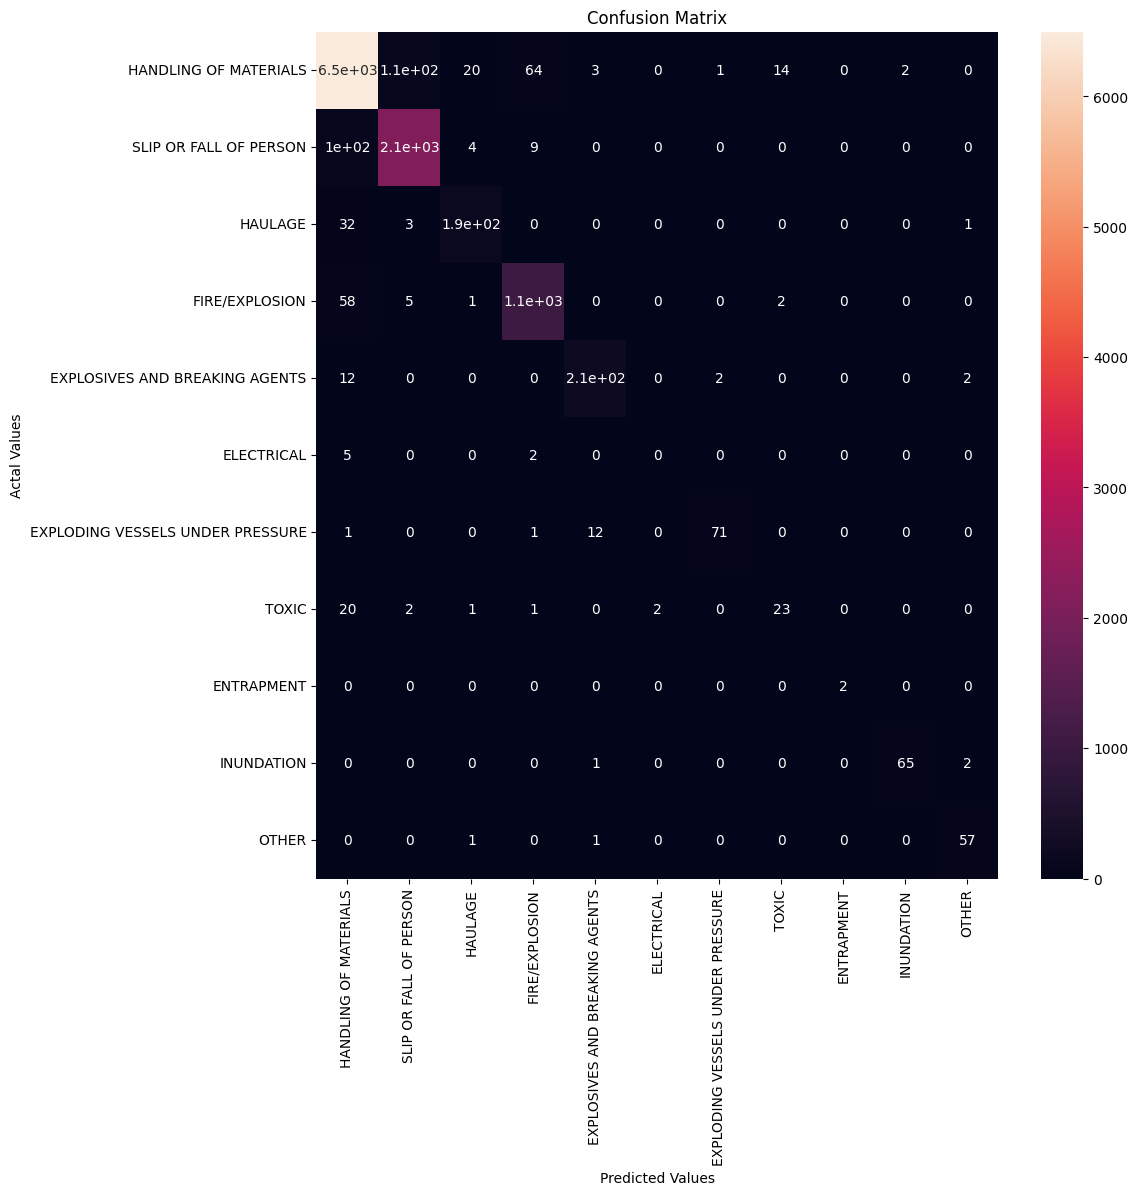

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm,
                     index = class_encode.keys(),
                     columns = class_encode.keys())
plt.figure(figsize=(11,11))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()
